In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import torch.optim as optim
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import time
!pip install torchmetrics
import torch
from torchvision import datasets, transforms

from torchmetrics.classification import BinaryROC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.4 MB/s eta 0:00:00


In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
import zipfile

In [4]:
!unzip /content/cnn_dataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: cnn_dataset/Y/17149.png  
 extracting: cnn_dataset/Y/1721.png  
 extracting: cnn_dataset/Y/17222.png  
 extracting: cnn_dataset/Y/17252.png  
 extracting: cnn_dataset/Y/17304.png  
 extracting: cnn_dataset/Y/17315.png  
 extracting: cnn_dataset/Y/17316.png  
 extracting: cnn_dataset/Y/17321.png  
 extracting: cnn_dataset/Y/17359.png  
 extracting: cnn_dataset/Y/17366.png  
 extracting: cnn_dataset/Y/17372.png  
 extracting: cnn_dataset/Y/17374.png  
 extracting: cnn_dataset/Y/1738.png  
 extracting: cnn_dataset/Y/17413.png  
 extracting: cnn_dataset/Y/17430.png  
 extracting: cnn_dataset/Y/17458.png  
 extracting: cnn_dataset/Y/17475.png  
 extracting: cnn_dataset/Y/17493.png  
 extracting: cnn_dataset/Y/17566.png  
 extracting: cnn_dataset/Y/17568.png  
 extracting: cnn_dataset/Y/17571 (2).png  
 extracting: cnn_dataset/Y/17571.png  
 extracting: cnn_dataset/Y/17575.png  
 extracting: cnn_dataset/Y/17604.png  
 extracting

In [5]:
import glob

fpath = glob.glob('cnn_dataset')

In [6]:
transform = transforms.Compose([transforms.Resize((28, 28)),transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))  ])

In [7]:
dataset = datasets.ImageFolder('cnn_dataset', transform=transform)


In [8]:
from torch.utils.data import random_split, DataLoader


total_size = len(dataset)
train_size = int(total_size * 0.7)
validation_size = int(total_size * 0.2)
test_size = total_size - (train_size + validation_size)
train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [9]:
print(f'Total dataset size: {len(dataset)}')
print(f'Training set size: {len(train_dataset)}')
print(f'Validation set size: {len(validation_dataset)}')
print(f'Test set size: {len(test_dataset)}')

Total dataset size: 100800
Training set size: 70560
Validation set size: 20160
Test set size: 10080


In [10]:

s = 0
s2 = 0
n = 0


for data, _ in train_loader:

    data = data * 0.5 + 0.5

    s += data.sum()
    s2 += (data ** 2).sum()
    n += data.numel()


print("==================== Pixel Intensity Statistics ===================== ")
mean = s / n
std = (s2 / n - mean ** 2) ** 0.5

print(f'Mean: {mean}')
print(f'Std Dev: {std}')


==================== Pixel Intensity Statistics ===================== 
Mean: 0.17575742304325104
Std Dev: 0.33361369371414185


In [11]:
train_dataiter = iter(train_loader)
validation_dataiter = iter(validation_loader)
test_dataiter = iter(test_loader)

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from sklearn.manifold import TSNE

images,labels= next(train_dataiter)

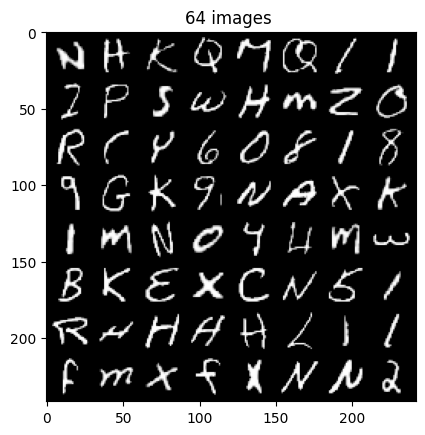

23 17 20 26 22 26 21 1 18 25 28 32 17 22 35 0 27 12 34 6 0 8 1 8 9 16 20 9 23 10 33 20 18 22 23 24 34 4 22 32 11 20 14 33 12 23 5 1 27 17 17 17 17 21 18 1 15 22 33 15 33 23 23 2


In [13]:
import torchvision
from torchvision.utils import make_grid

temp = torchvision.utils.make_grid(images).numpy()
plt.imshow(np.transpose(temp, (1, 2, 0)), cmap='gray')
plt.title("64 images ")
plt.show()
print(' '.join(f'{labels[j].item()}' for j in range(64)))

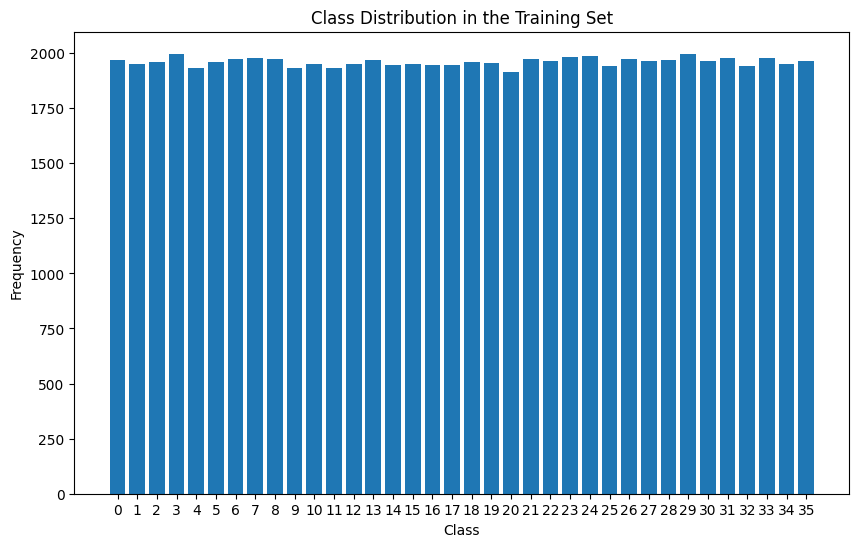

In [14]:
tl = [label for _, label in train_dataset]
plt.figure(figsize=(10, 6))
plt.hist(tl, bins=np.arange(37) - 0.5, rwidth=0.8)
plt.title('Class Distribution in the Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(np.arange(36))
plt.show()

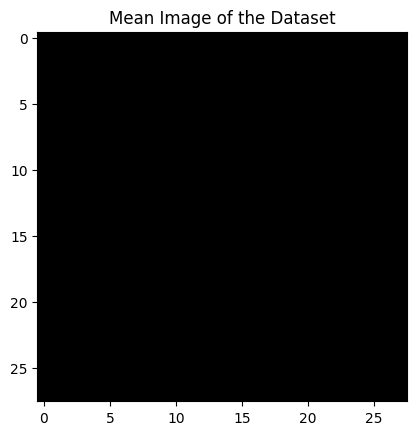

In [15]:
mi = torch.mean(torch.stack([i for i, _ in train_dataset]), dim=0)

npimg = mi.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
plt.title('Mean Image of the Dataset')
plt.show()

In [16]:
images.shape

torch.Size([64, 3, 28, 28])

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [18]:
class CNN_task3(nn.Module):
    def __init__(self):
        super(CNN_task3, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_block = nn.Sequential(
            nn.Linear(64 * 7 * 7, 1000),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1000, 100),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(100, 36)
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc_block(x)
        return F.log_softmax(x, dim=1)

In [19]:
learning_rate = 0.001
epochs = 7

In [20]:
model = CNN_task3()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
validation_losses = []

print(model)

import time


CNN_task3(
  (conv_block): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_block): Sequential(
    (0): Linear(in_features=3136, out_features=1000, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1000, out_features=100, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=100, out_features=36, bias=True)
  )
)


In [21]:
st = time.time()
min_val_loss = float('inf')
train_accuracies = []
val_accuracies = []
train_losses = []
validation_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_accuracy = []
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        _,train_predictions = torch.max(output.data,1)
        train_accuracy.append(accuracy_score(target, train_predictions))

        loss.backward()
        optimizer.step()
        train_loss = train_loss + loss.item()

    train_loss  = train_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracies.append(sum(train_accuracy)/len(train_accuracy))
    print(f" ============ Epoch : {epoch + 1} =========== ")
    print(f"Training loss in this epoch: {train_loss} ")


    model.eval()
    validation_loss = 0
    val_accuracy = []

    with torch.no_grad():
      for data, val_target in validation_loader:
        output = model(data)
        loss = criterion(output,val_target)
        _,val_predictions = torch.max(output.data,1)
        val_accuracy.append(accuracy_score(val_target, val_predictions))
        validation_loss = validation_loss + loss.item()

    validation_loss = validation_loss / len(validation_loader)
    validation_losses.append(validation_loss)
    val_accuracies.append(sum(val_accuracy)/len(val_accuracy))
    print(f"Validation loss in this epoch : {validation_loss}")
    train_losses.append(train_loss)
    validation_losses.append(validation_loss)

    if validation_loss < min_val_loss:
      min_val_loss = validation_loss
      temp = 0
    else:
      temp = temp + 1
      if temp >= 2:
        print("breaking out from epochs to counter overfitting")
        break

et = time.time()


 ============ Epoch : 1 =========== 
Training loss in this epoch: 0.989971564638539 
Validation loss in this epoch : 0.36075366044801377
 ============ Epoch : 2 =========== 
Training loss in this epoch: 0.4705844971259291 
Validation loss in this epoch : 0.3058408058351941
 ============ Epoch : 3 =========== 
Training loss in this epoch: 0.39282848809593285 
Validation loss in this epoch : 0.28350506498227046
 ============ Epoch : 4 =========== 
Training loss in this epoch: 0.3487706309148969 
Validation loss in this epoch : 0.27811746479026855
 ============ Epoch : 5 =========== 
Training loss in this epoch: 0.32090411934383545 
Validation loss in this epoch : 0.2747098261401767
 ============ Epoch : 6 =========== 
Training loss in this epoch: 0.3058153869937143 
Validation loss in this epoch : 0.25621979168010134
 ============ Epoch : 7 =========== 
Training loss in this epoch: 0.288737930769501 
Validation loss in this epoch : 0.26006992125795003


In [22]:
st_test = time.time()

model.eval()
y_true, y_pred , y_pred_2= [],[],[]

test_loss = 0
with torch.no_grad():
  for input, test_target in test_loader:
    output = model(input)
    tl = criterion(output, test_target)
    test_loss = test_loss+tl.item()
    x,y = torch.max(output.data,1)
    y_true.extend(test_target.tolist())
    y_pred.extend(y.tolist())
    y_pred_2.extend(output.data.tolist())


et_test = time.time();
print(f"training time : {et-st}")
test_acc = sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
precision, recall, f1,_ = precision_recall_fscore_support(y_true, y_pred, average= "weighted")

print("========== Evaluation metrics on testing dataset =================")
print(f"Testing time : {et_test - st_test}")
print(f"Testing accuracy : {test_acc}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")

training time : 559.4677722454071
========== Evaluation metrics on testing dataset =================
Testing time : 5.723034381866455
Testing accuracy : 0.9057539682539683
precision : 0.9173181840690283
recall : 0.9057539682539683
f1 : 0.9037330253842752


In [23]:
torch.save(model.state_dict(), 'model_weights.pth')

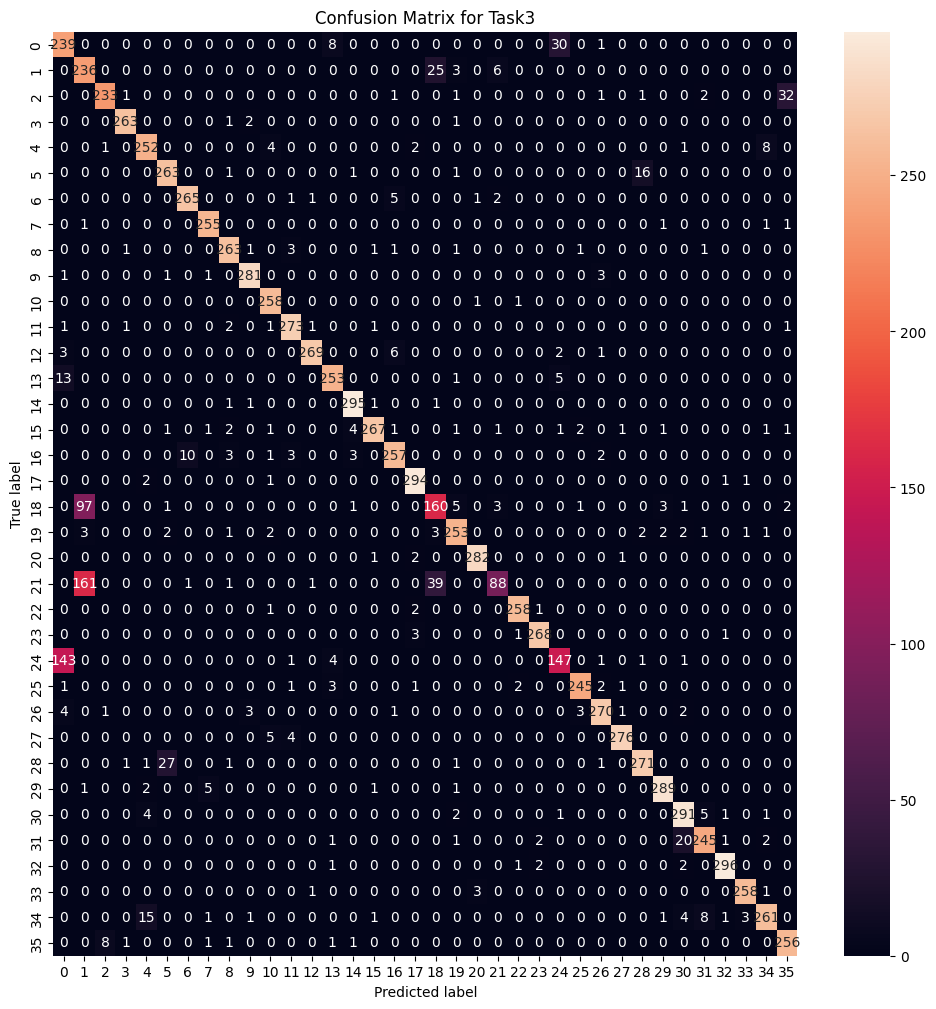

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix for Task3')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

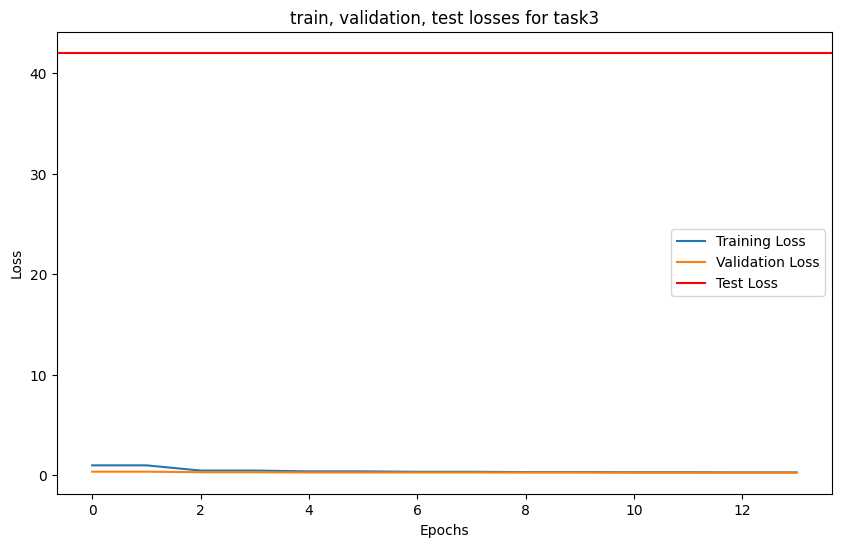

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='-', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train, validation, test losses for task3')
plt.legend()
plt.show()

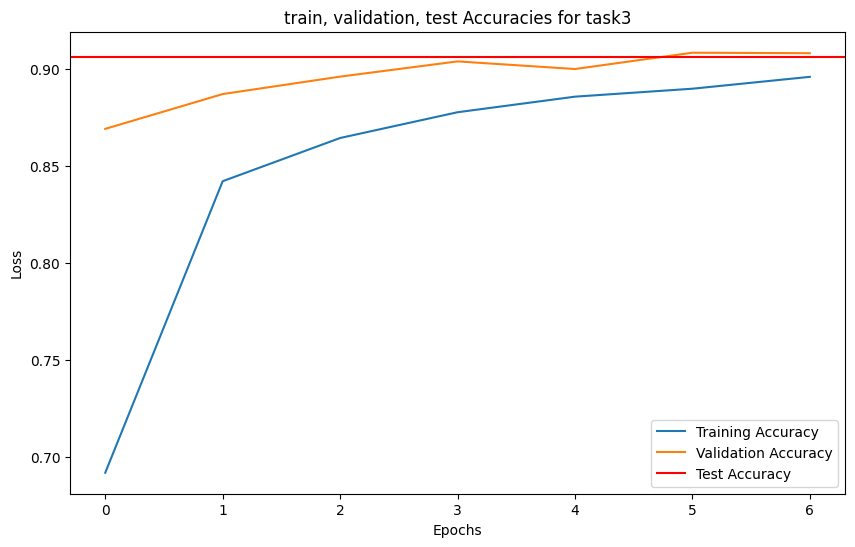

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='-', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train, validation, test Accuracies for task3')
plt.legend()
plt.show()

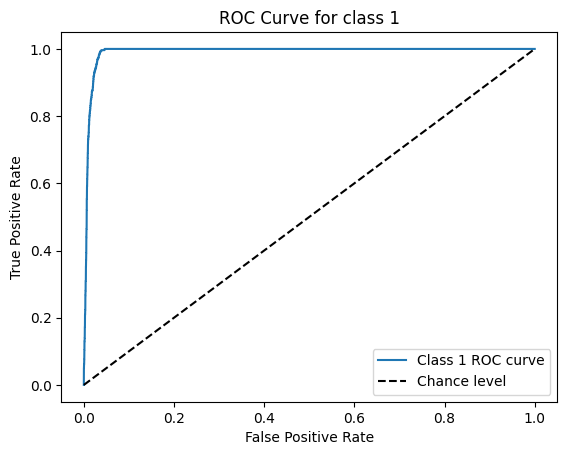

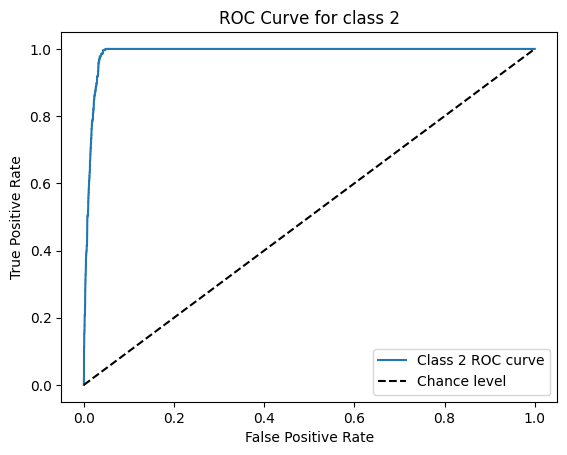

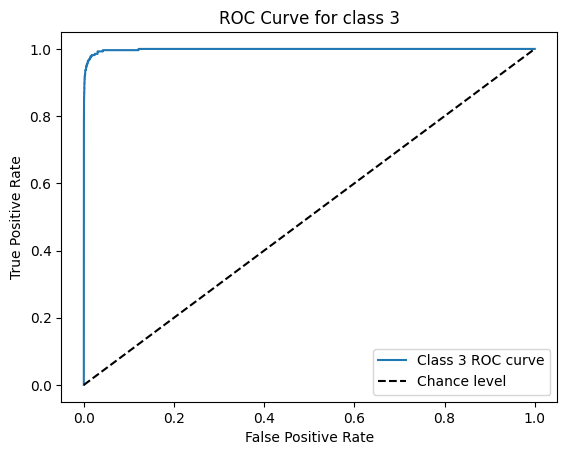

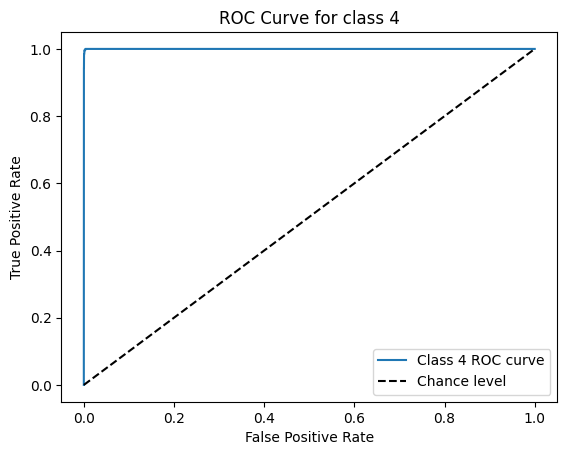

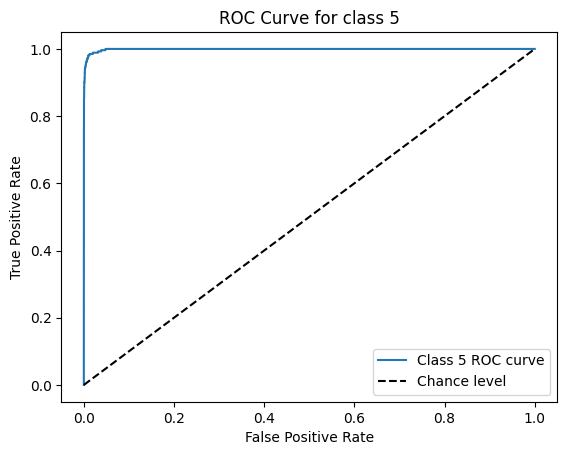

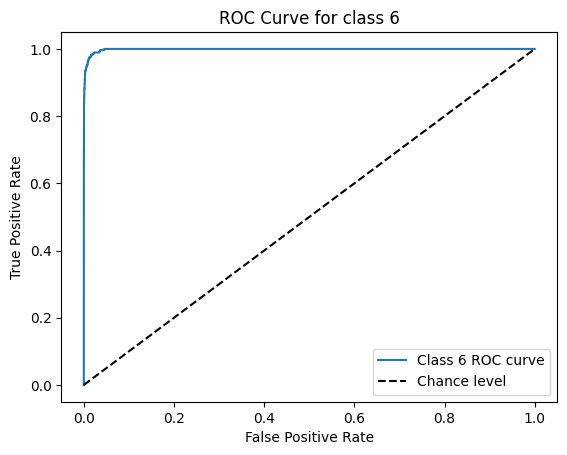

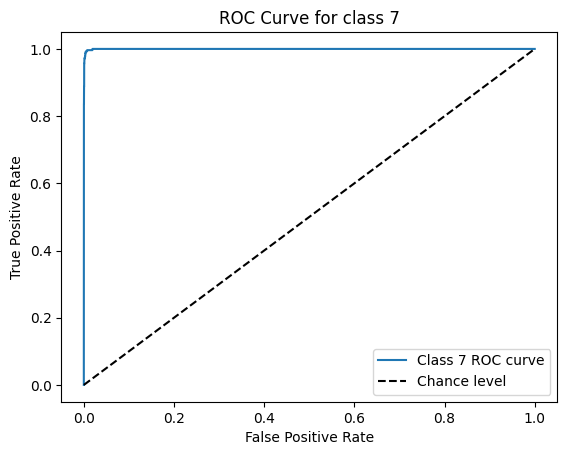

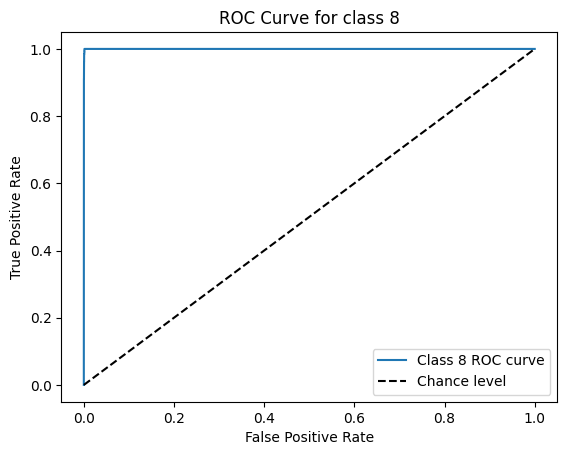

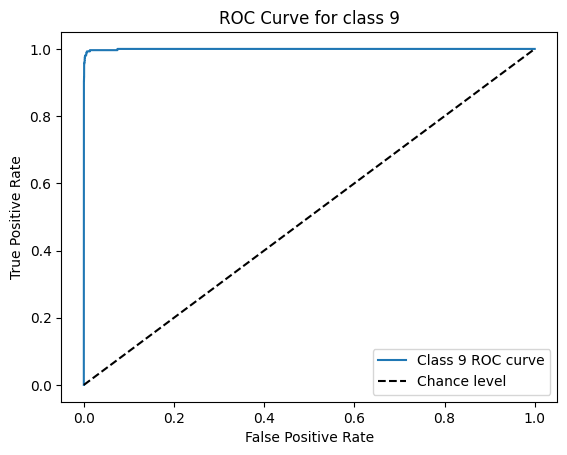

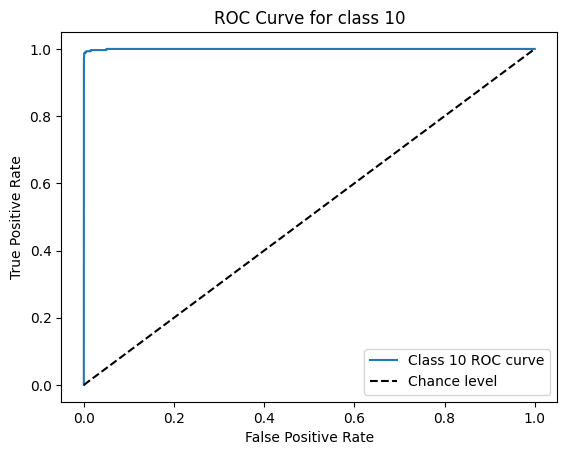

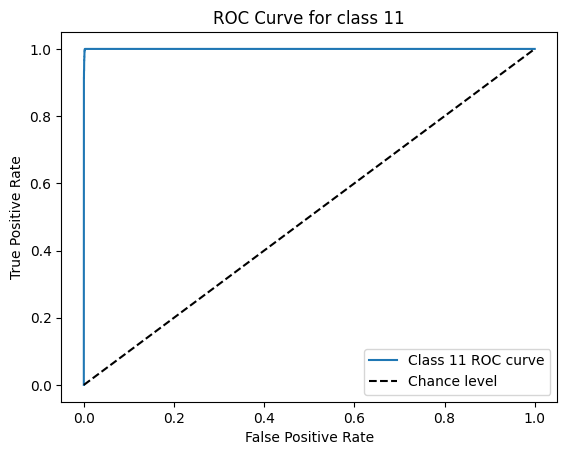

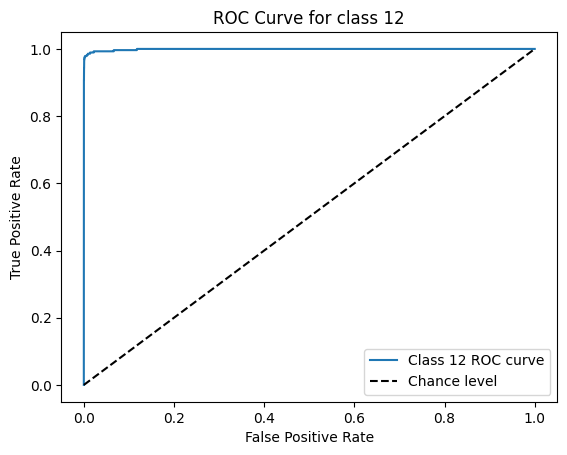

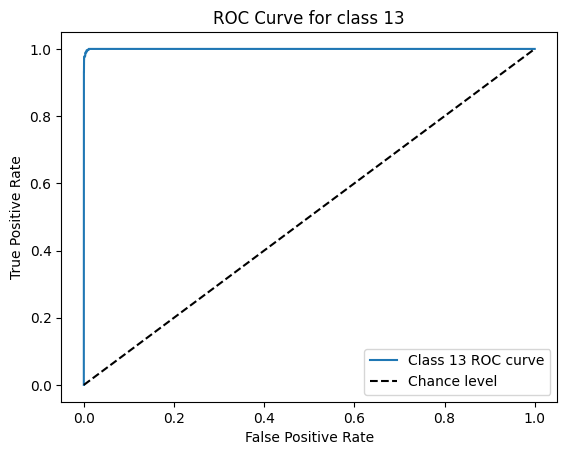

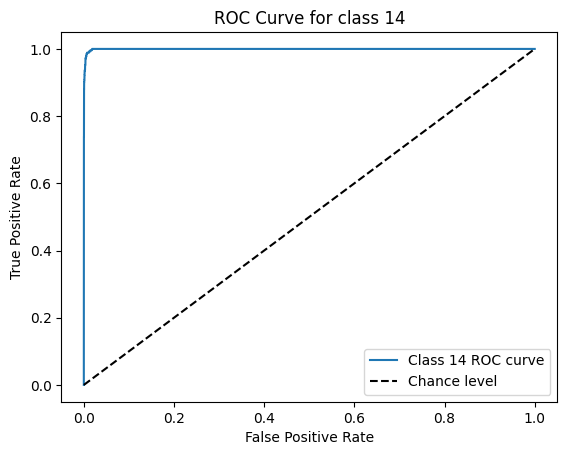

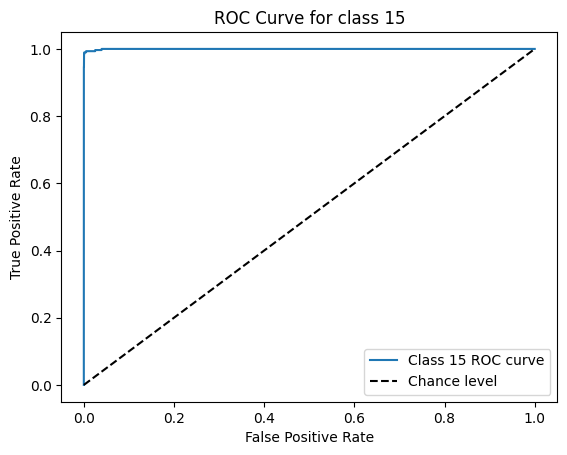

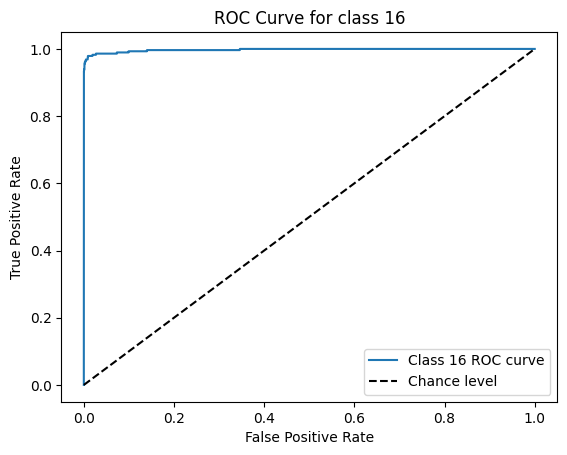

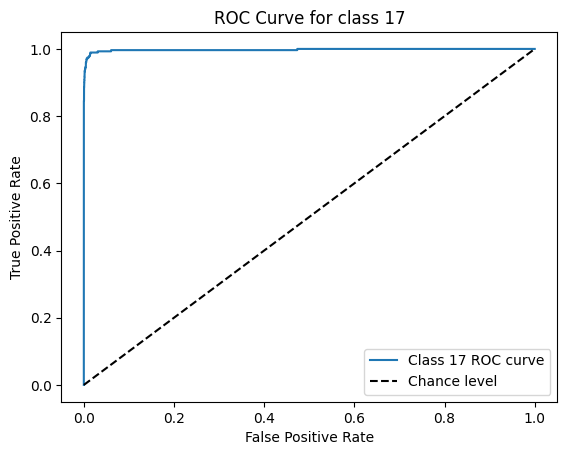

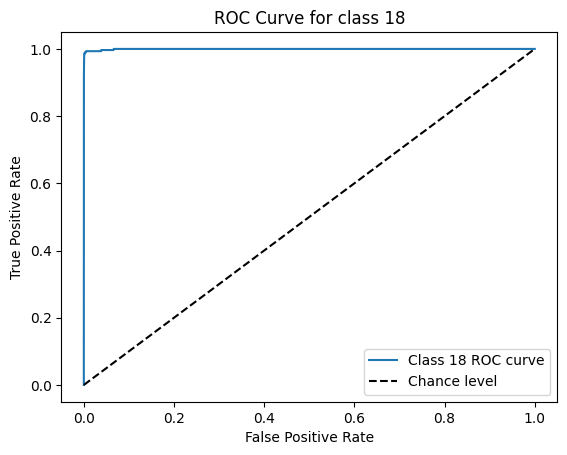

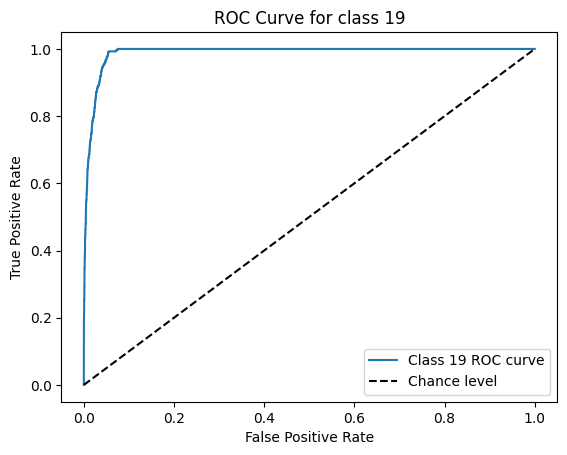

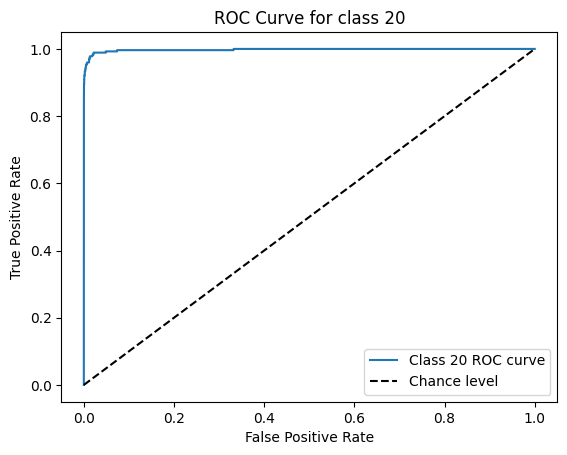

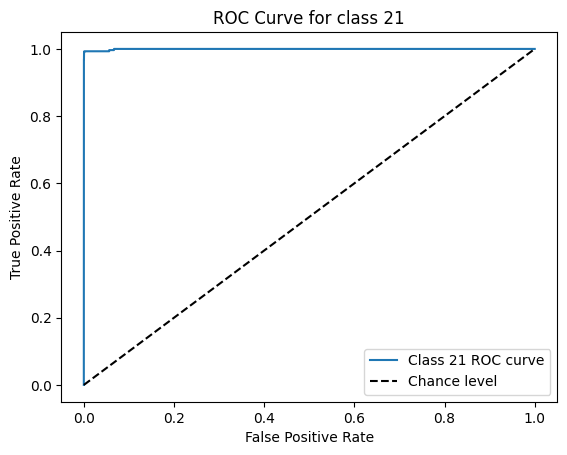

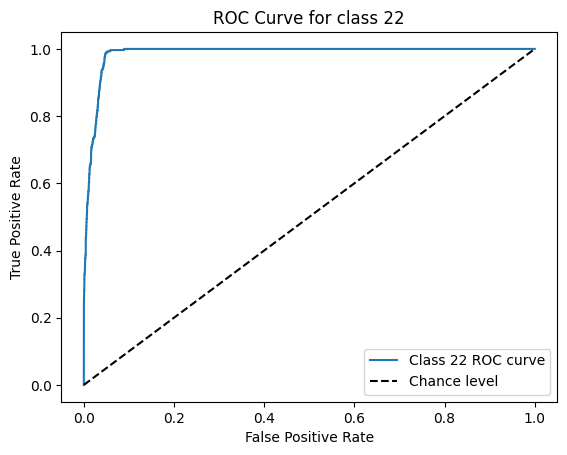

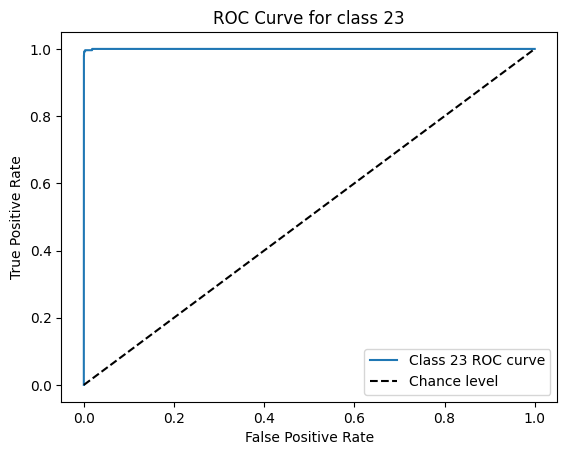

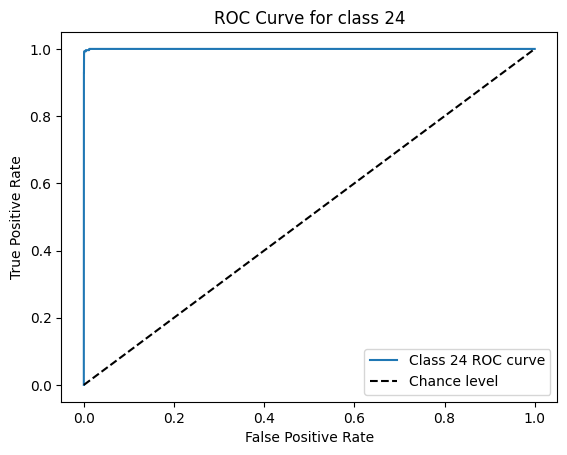

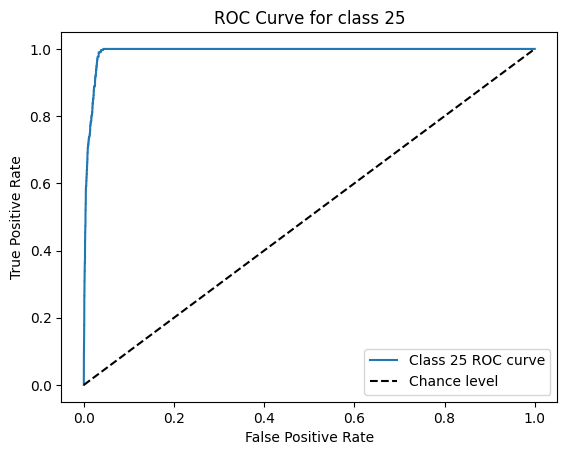

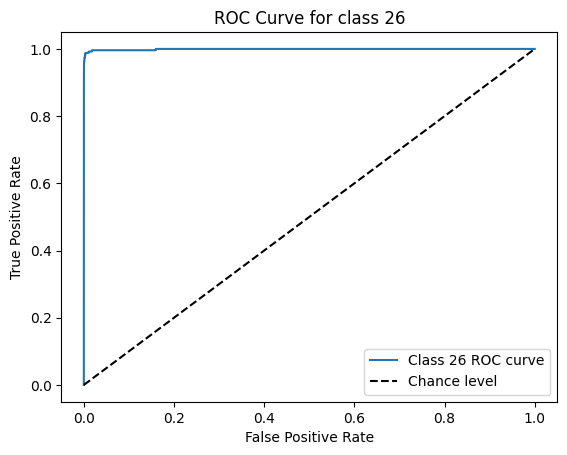

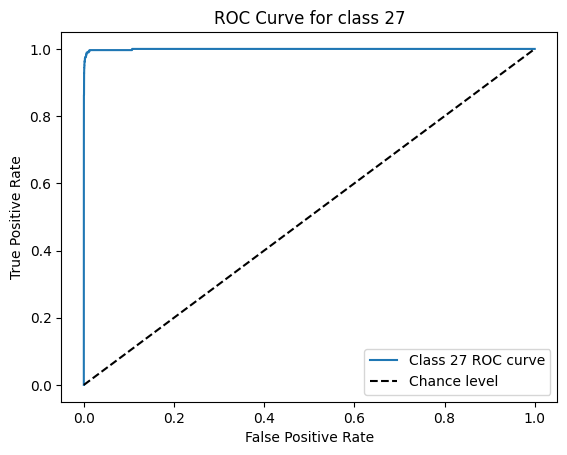

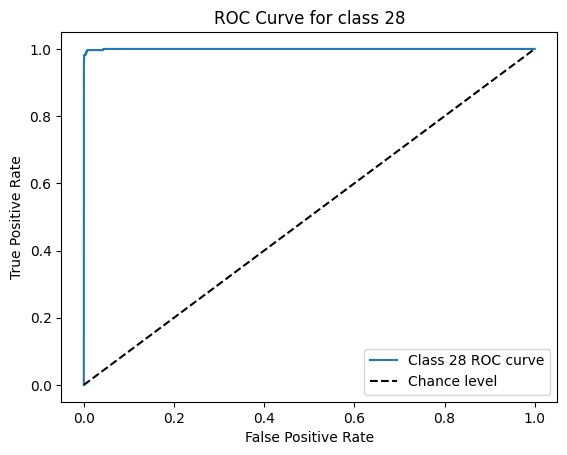

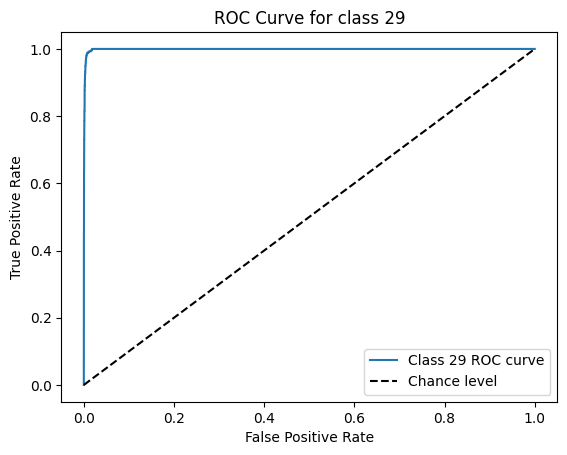

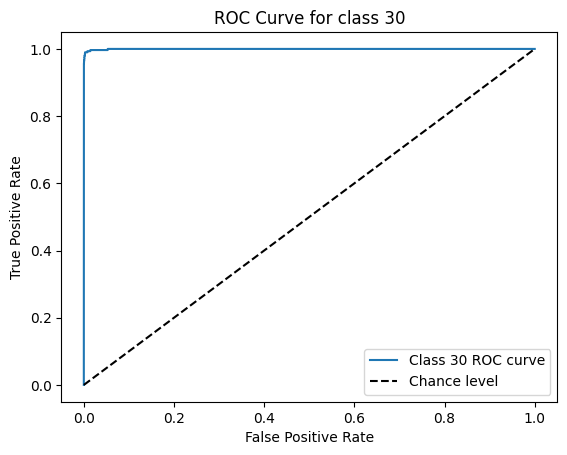

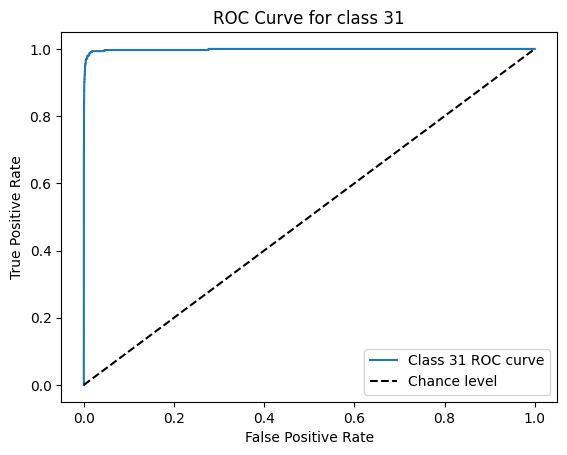

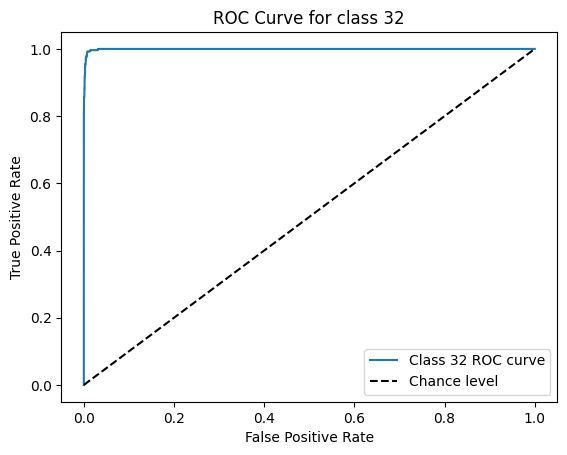

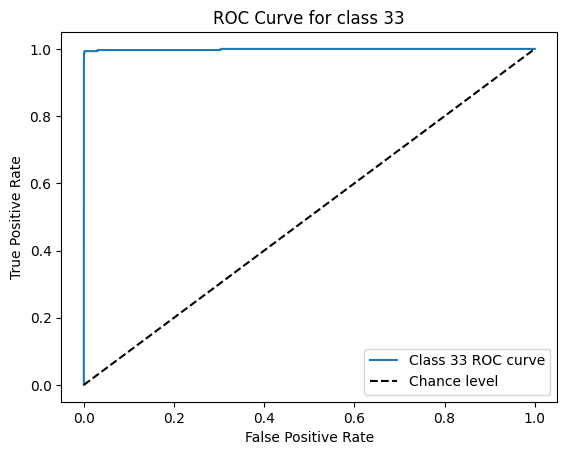

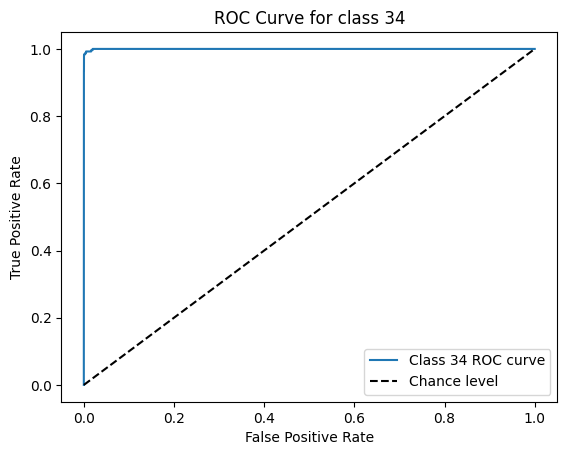

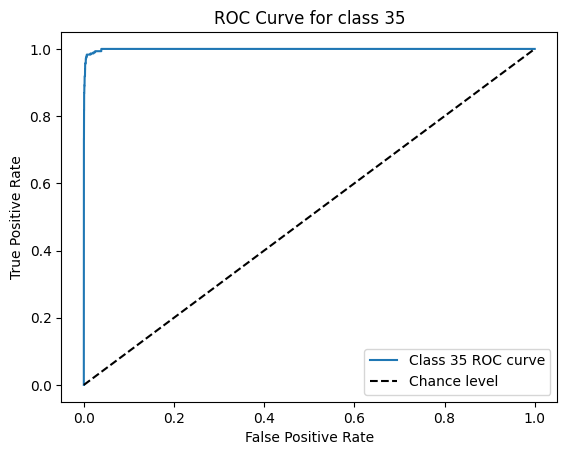

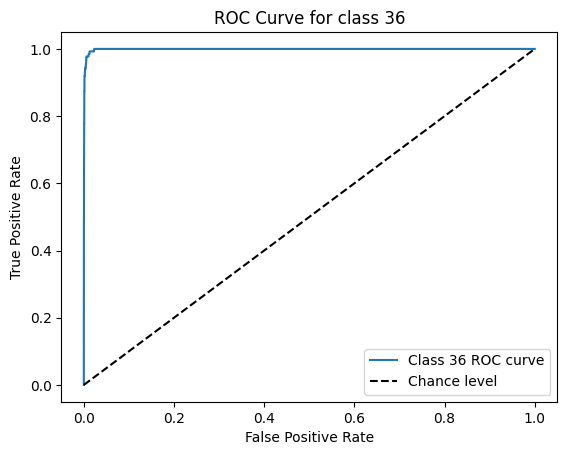

In [27]:
import torch
from torchmetrics import ROC
import matplotlib.pyplot as plt
y_pred = torch.tensor(y_pred_2)
y_true = torch.tensor(y_true, dtype=torch.int64)
metric = ROC(num_classes=36, task="multiclass")
metric.update(y_pred, y_true)
x, y, z = metric.compute()
for i, (class_fpr, class_tpr) in enumerate(zip(x, y)):
    plt.plot(class_fpr, class_tpr, label=f'Class {i+1} ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance level')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for class {i+1}')
    plt.legend(loc="lower right")
    plt.show()


In [28]:
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Device : {device}")

 Device : cuda


# **Task 4**

In [29]:
transform = transforms.Compose([transforms.Resize((224, 224)),transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))  ])
dataset_task4 = datasets.ImageFolder('cnn_dataset', transform=transform)
total_size = len(dataset_task4)
train_size = int(total_size * 0.8)
validation_size = int(total_size * 0.1)
test_size = total_size - (train_size + validation_size)


train_dataset, validation_dataset, test_dataset = random_split(dataset_task4, [train_size, validation_size, test_size])

train_loader_task4 = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader_task4 = DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader_task4 = DataLoader(test_dataset, batch_size=64, shuffle=False)

train_dataiter = iter(train_loader_task4)
validation_dataiter = iter(validation_loader_task4)
test_dataiter = iter(test_loader_task4)

print(f'Total dataset_task4 size: {len(dataset_task4)}')
print(f'Training set size: {len(train_dataset)}')
print(f'Validation set size: {len(validation_dataset)}')
print(f'Test set size: {len(test_dataset)}')

images,_ = next(train_dataiter)

print(f"Images shape : {images.shape}")


Total dataset_task4 size: 100800
Training set size: 80640
Validation set size: 10080
Test set size: 10080
Images shape : torch.Size([64, 3, 224, 224])


In [30]:
import torch
import torch.nn as nn

class Model_task4(nn.Module):
    def __init__(self, num_classes=36):
        super(Model_task4, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

model_task4 = Model_task4(num_classes=36)
model_task4 = model_task4.to(device)
print(model_task4)

Model_task4(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=

In [31]:

from torch.optim.lr_scheduler import ReduceLROnPlateau

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_task4.parameters(), lr=0.333, momentum=0.9, weight_decay=5e-4)
train_losses_task4 = []
validation_losses_task4 = []

st = time.time()
min_val_loss = float('inf')
train_accuracies_task4 = []
val_accuracies_task4 = []
train_losses_task4 = []
validation_losses_task4 = []

epochs = 7
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=0, verbose=True)
best_accuracy = 0

for epoch in range(epochs):
    model_task4.train()
    train_loss = 0
    train_accuracy = []
    for data, target in train_loader_task4:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_task4(data)
        loss = criterion(output, target)
        _,train_predictions = torch.max(output.data,1)
        train_accuracy.append(accuracy_score(target.cpu().numpy(), train_predictions.cpu().numpy()))
        loss.backward()
        optimizer.step()
        train_loss = train_loss + loss.item()

    train_loss  = train_loss / len(train_loader_task4)
    train_losses_task4.append(train_loss)
    train_accuracies_task4.append(sum(train_accuracy)/len(train_accuracy))
    print(f" ============ Epoch : {epoch + 1} =========== ")
    print(f"Training loss in this epoch: {train_loss} ")


    model_task4.eval()
    validation_loss = 0
    val_accuracy = []

    with torch.no_grad():
      for data, val_target in validation_loader_task4:
        data, val_target = data.to(device), val_target.to(device)
        output = model_task4(data)
        loss = criterion(output,val_target)
        _,val_predictions = torch.max(output.data,1)
        val_accuracy.append(accuracy_score(val_target.cpu().numpy(), val_predictions.cpu().numpy()))
        validation_loss = validation_loss + loss.item()

    validation_loss = validation_loss / len(validation_loader_task4)
    validation_losses_task4.append(validation_loss)
    temp = sum(val_accuracy)/len(val_accuracy)
    scheduler.step(temp)
    val_accuracies_task4.append(temp)
    print(f"Validation loss in this epoch : {validation_loss}")
    train_losses_task4.append(train_loss)
    validation_losses_task4.append(validation_loss)

    if temp > best_accuracy :
      best_accuracy = temp
      torch.save(model_task4.state_dict(), 'model_weights_task4.pth')

et = time.time()



 ============ Epoch : 1 =========== 
Training loss in this epoch: 3.5835303955607944 
Validation loss in this epoch : 3.5835399914391433
 ============ Epoch : 2 =========== 
Training loss in this epoch: 3.5835258383599538 
Validation loss in this epoch : 3.583534971068177
 ============ Epoch : 3 =========== 
Training loss in this epoch: 3.5835233574821834 
Validation loss in this epoch : 3.583519092089013
 ============ Epoch : 4 =========== 
Training loss in this epoch: 3.583528839028071 
Epoch 00004: reducing learning rate of group 0 to 3.3300e-02.
Validation loss in this epoch : 3.583528191228456
 ============ Epoch : 5 =========== 
Training loss in this epoch: 3.5835182229677836 
Epoch 00005: reducing learning rate of group 0 to 3.3300e-03.
Validation loss in this epoch : 3.5835292354414734
 ============ Epoch : 6 =========== 
Training loss in this epoch: 3.5835166734362405 
Epoch 00006: reducing learning rate of group 0 to 3.3300e-04.
Validation loss in this epoch : 3.5835294678241

In [32]:
st_test = time.time()

model_task4.eval()
y_true_task4, y_pred_task4 , y_pred_task4_2= [],[],[]

test_loss_task4 = 0
with torch.no_grad():
  for input, test_target in test_loader_task4:
    data, test_target = input.to(device), test_target.to(device)
    output = model_task4(data)
    tl = criterion(output, test_target)
    test_loss_task4 = test_loss_task4+tl.item()
    x,y = torch.max(output.data,1)
    y_true_task4.extend(test_target.cpu().numpy())
    y_pred_task4.extend(y.cpu().numpy())
    y_pred_task4_2.extend(output.data.cpu().numpy())


et_test = time.time();
print(f"training time : {et-st}")
test_acc_task4 = sum(np.array(y_true_task4) == np.array(y_pred_task4)) / len(y_true_task4)
precision, recall, f1,_ = precision_recall_fscore_support(y_true_task4, y_pred_task4, average= "weighted")

print("========== Evaluation metrics on testing dataset =================")
print(f"Testing time : {et_test - st_test}")
print(f"Testing accuracy : {test_acc_task4}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")

training time : 2175.3346519470215
========== Evaluation metrics on testing dataset =================
Testing time : 21.267615795135498
Testing accuracy : 0.026587301587301587
precision : 0.0007068846056941295
recall : 0.026587301587301587
f1 : 0.0013771543922297693


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


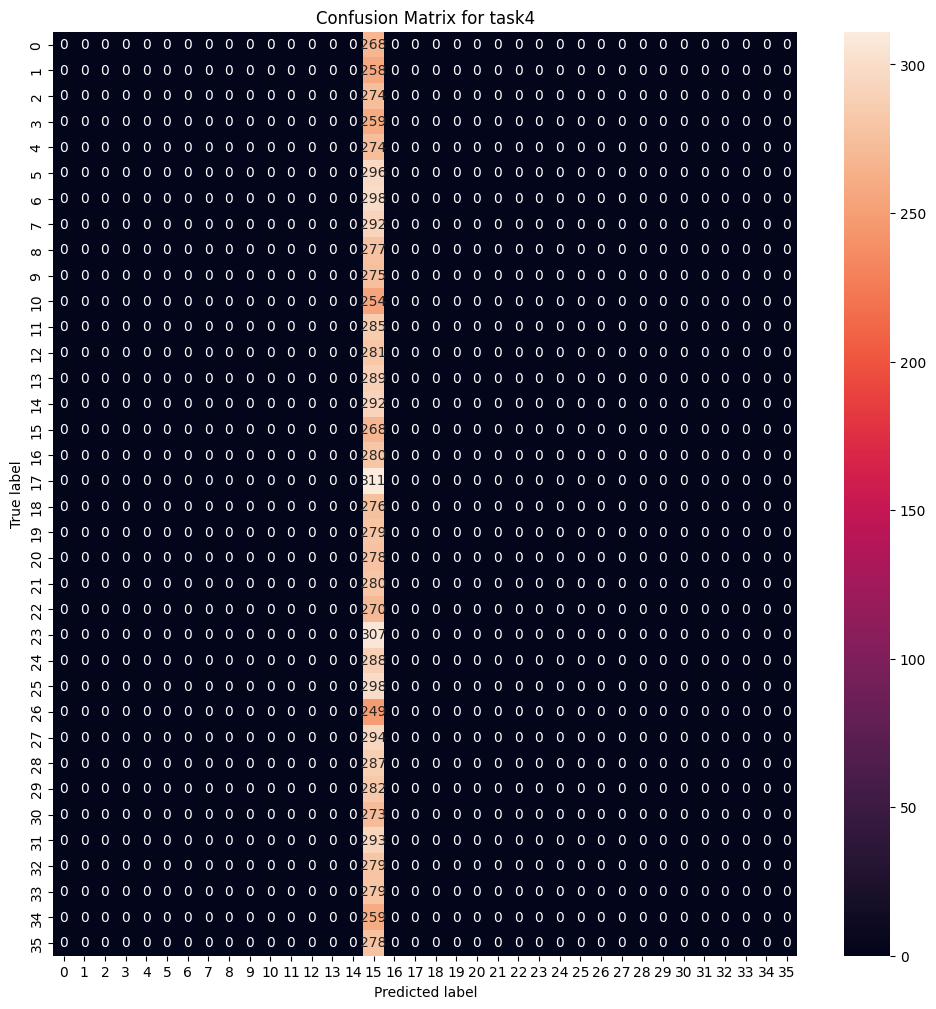

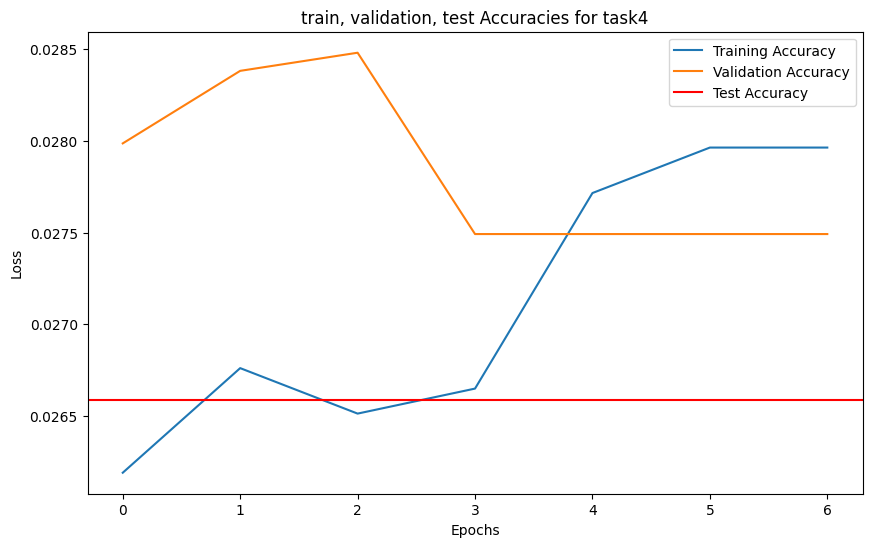

<ipython-input-33-92d2dd0ac674>:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  y_pred_task4 = torch.tensor(y_pred_task4_2)


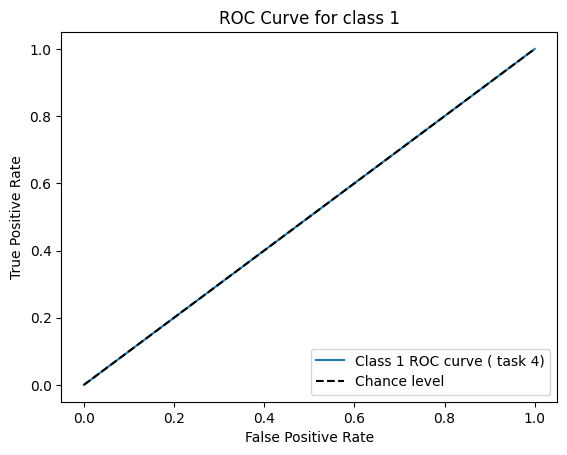

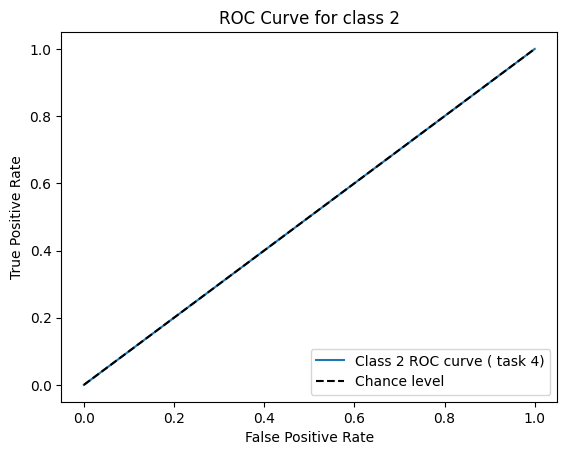

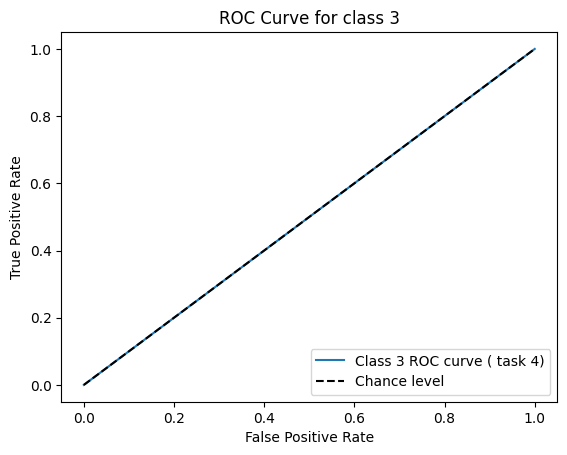

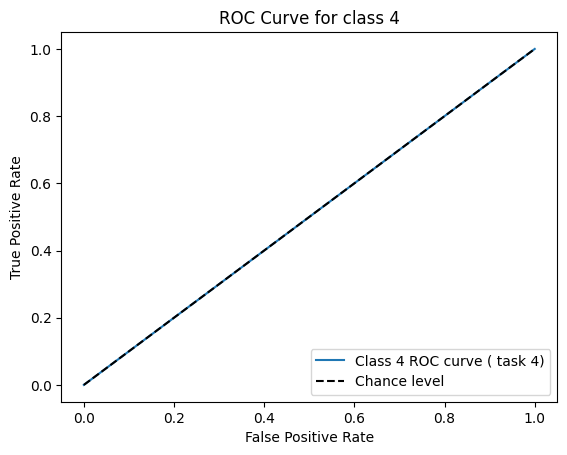

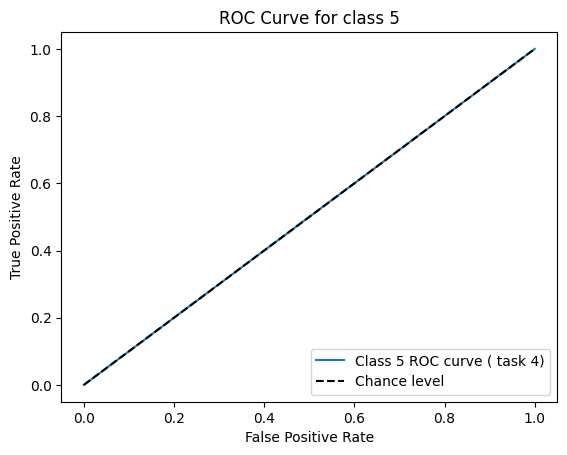

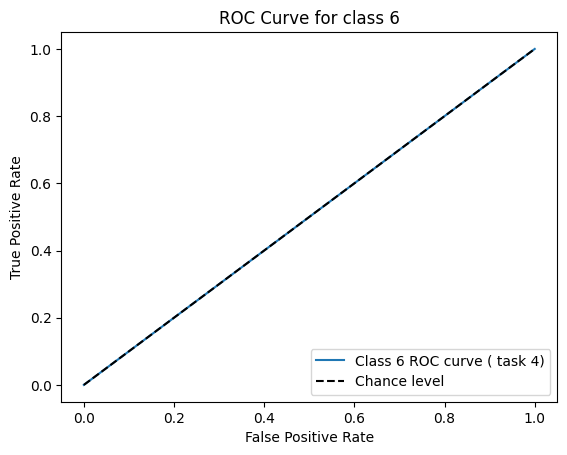

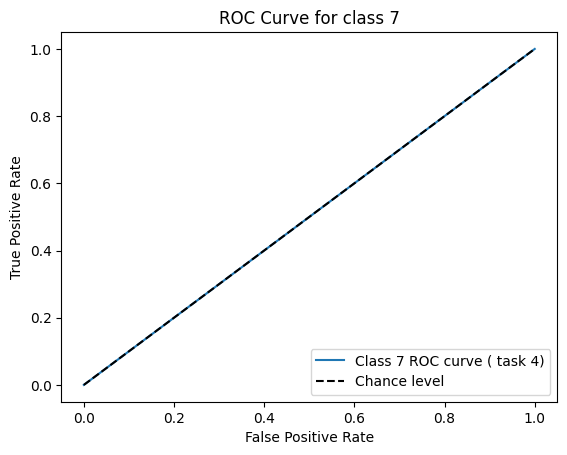

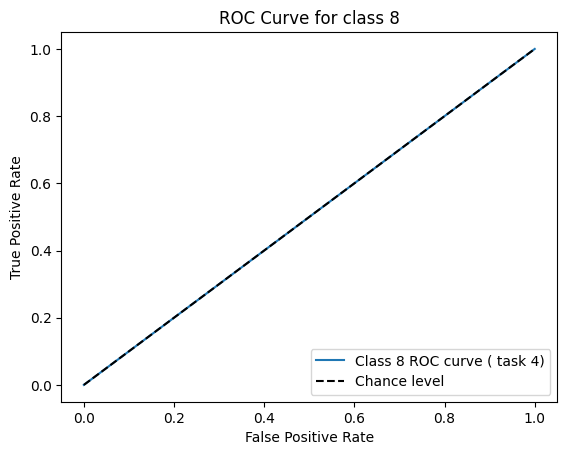

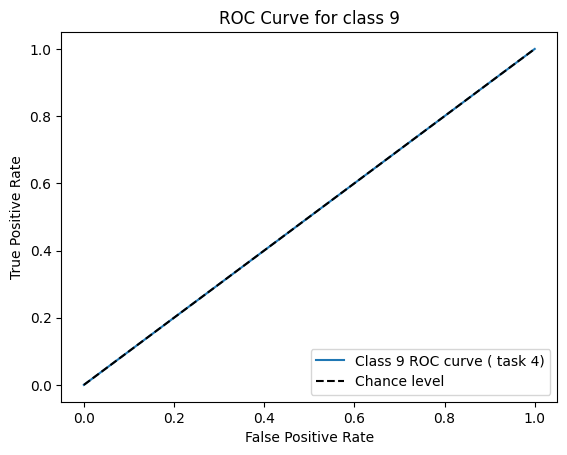

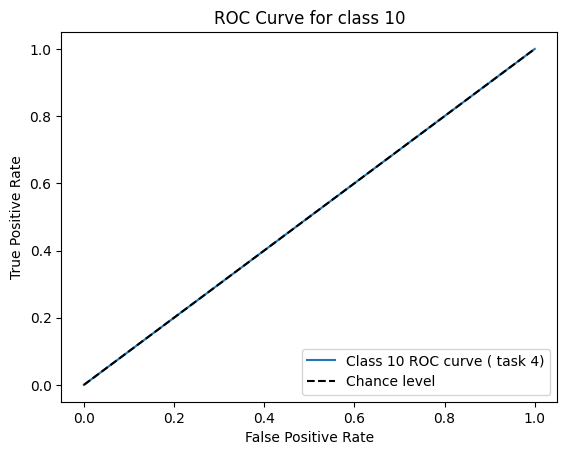

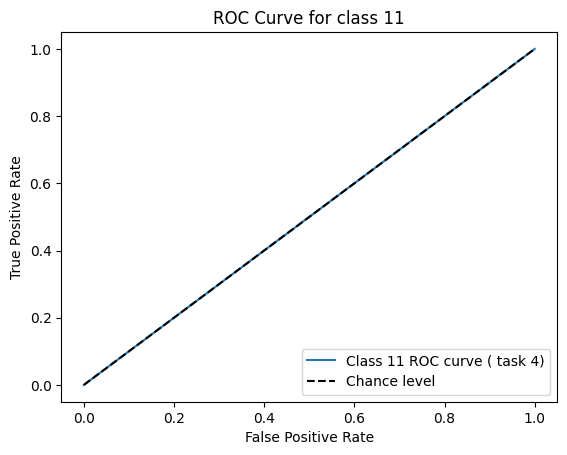

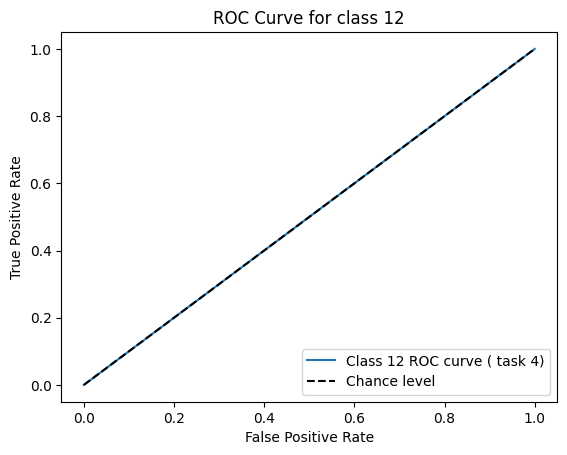

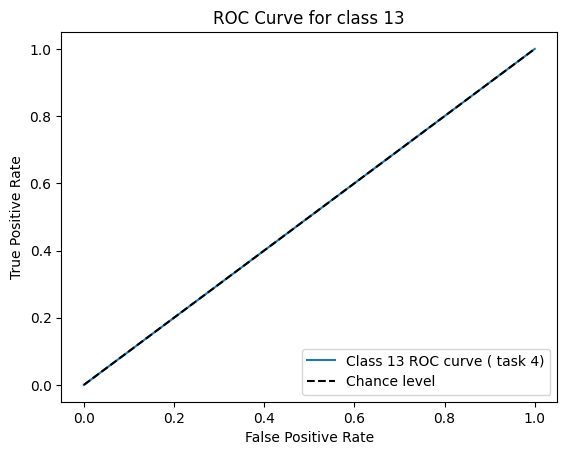

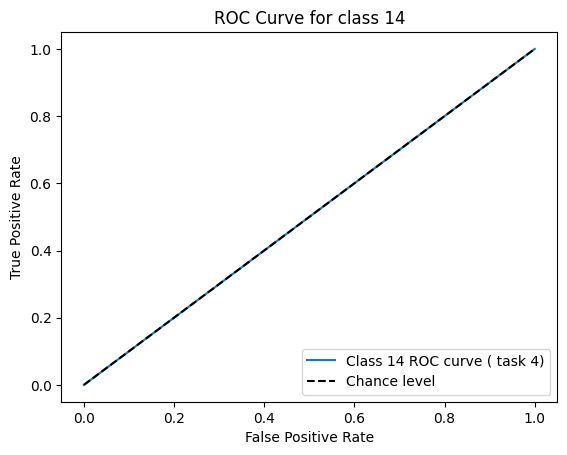

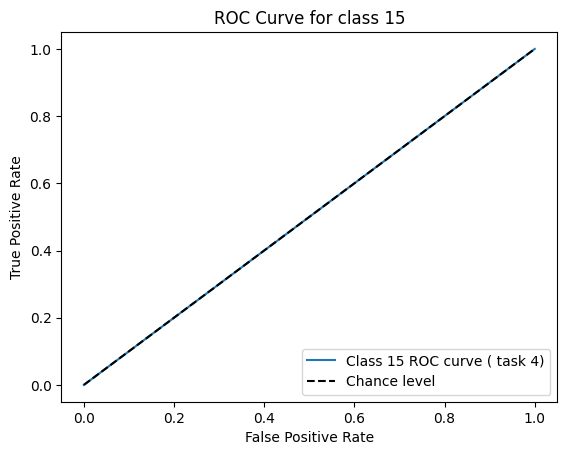

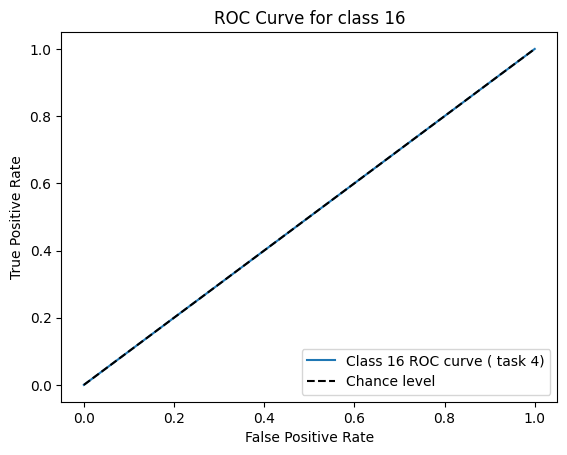

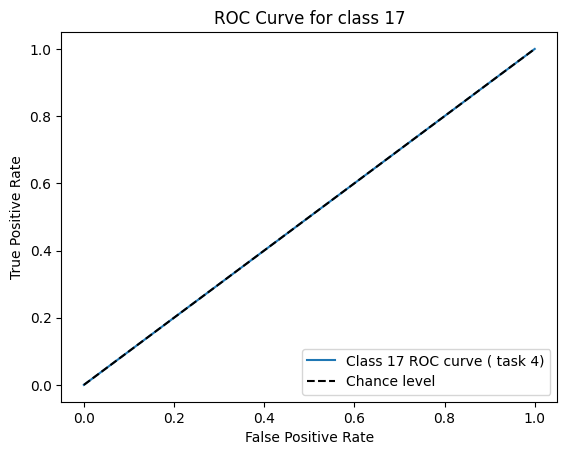

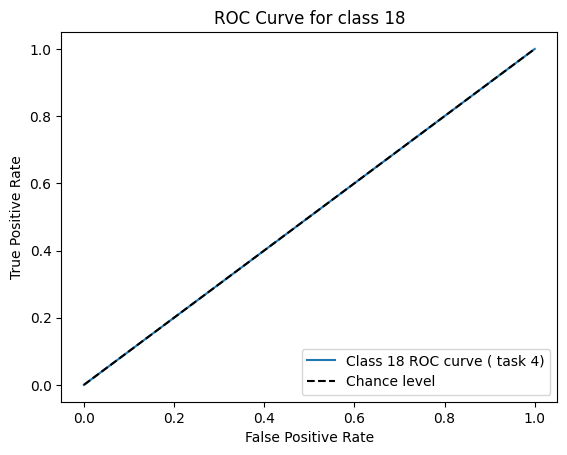

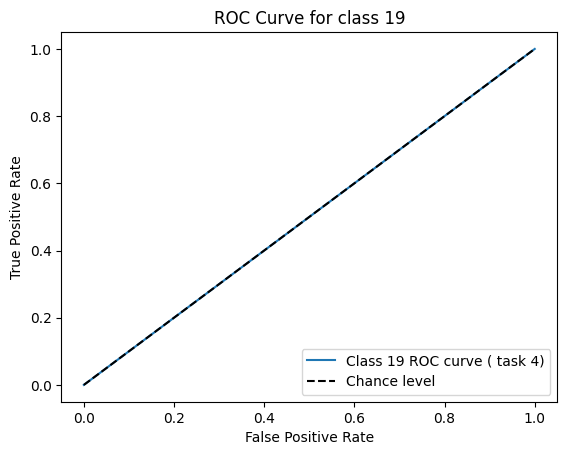

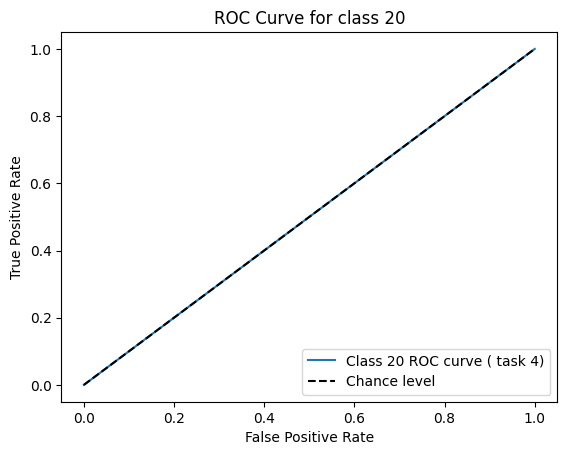

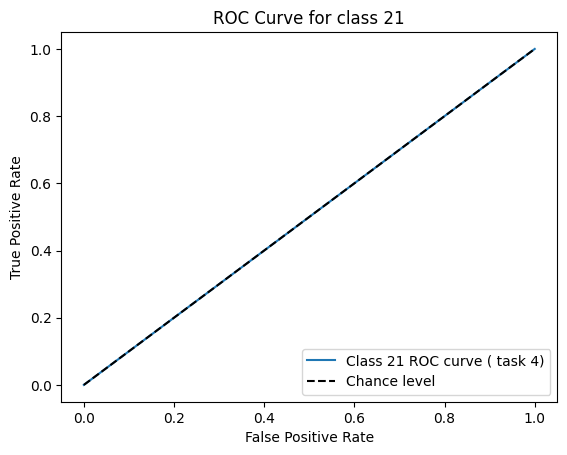

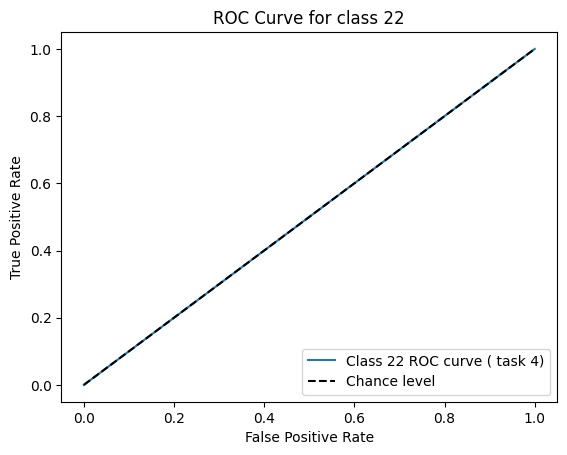

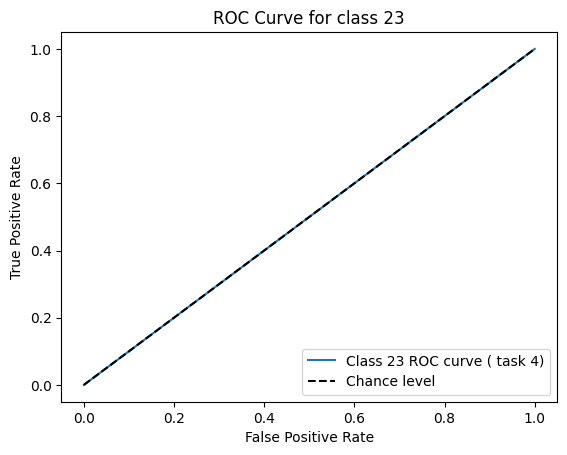

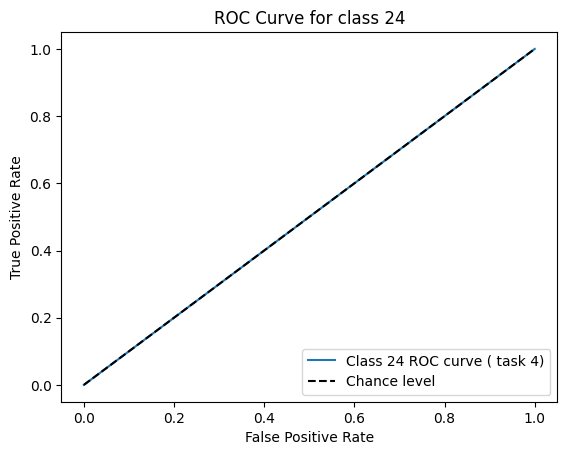

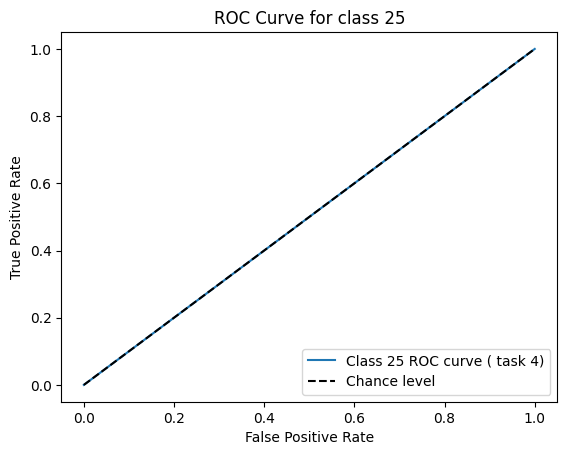

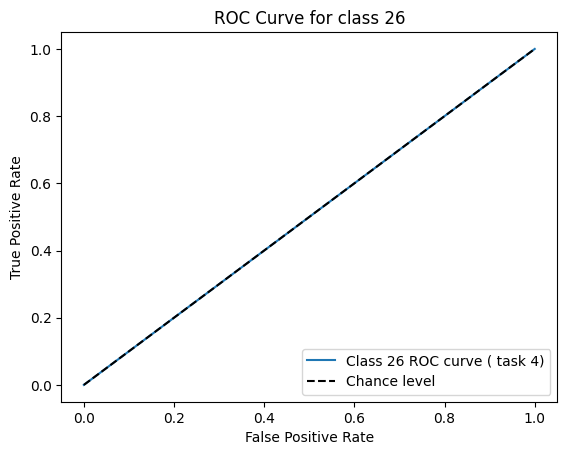

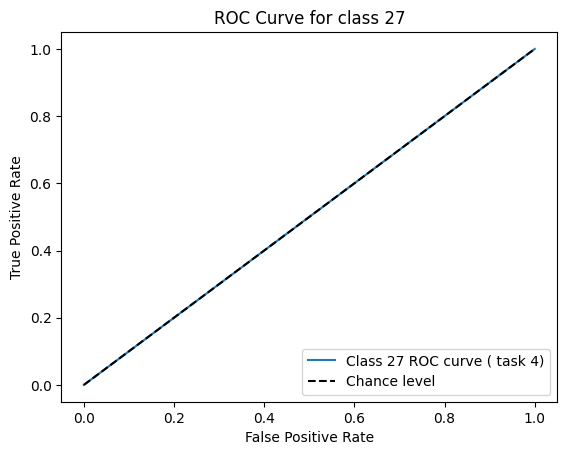

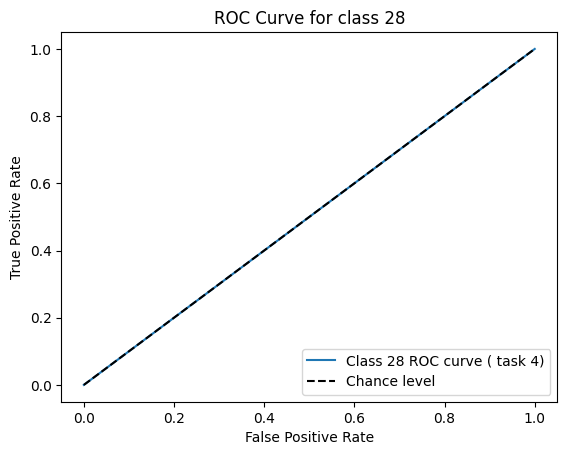

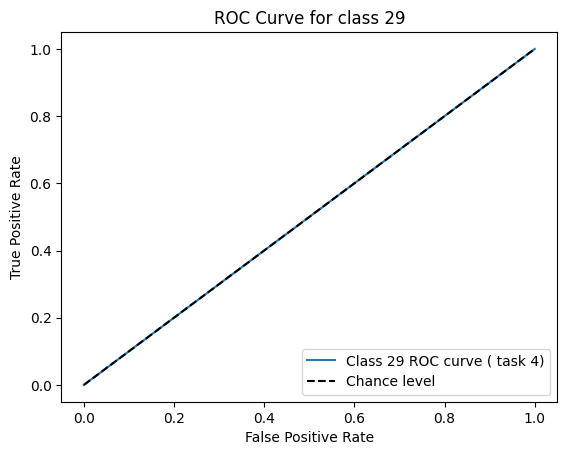

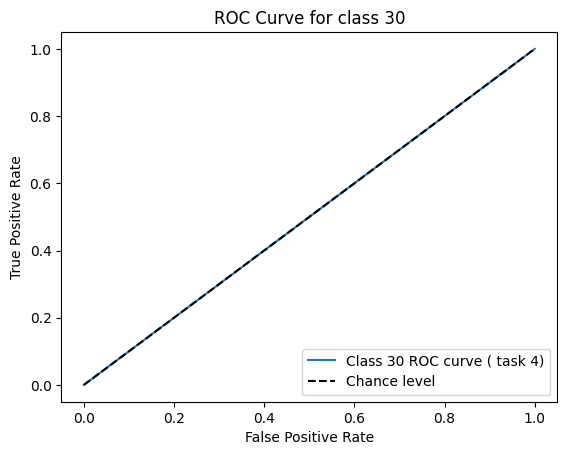

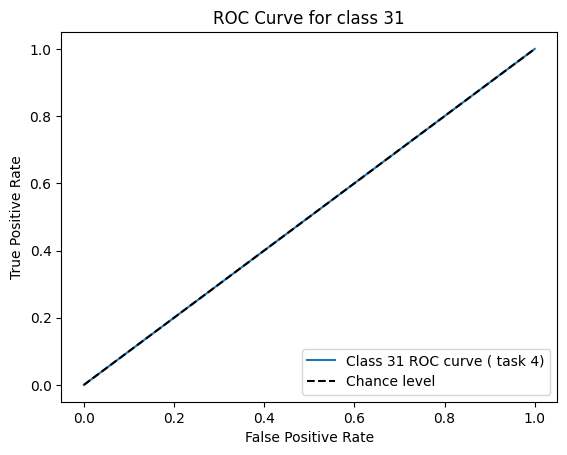

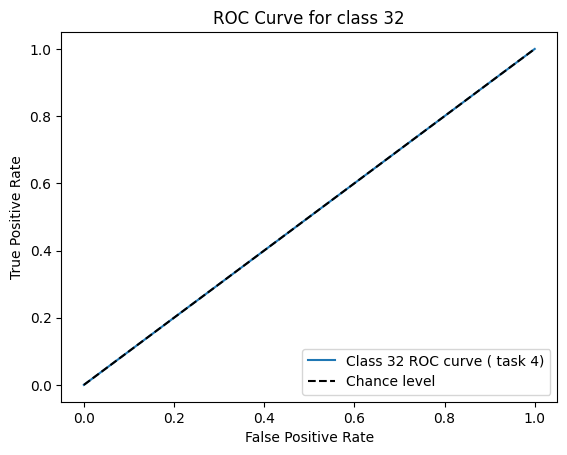

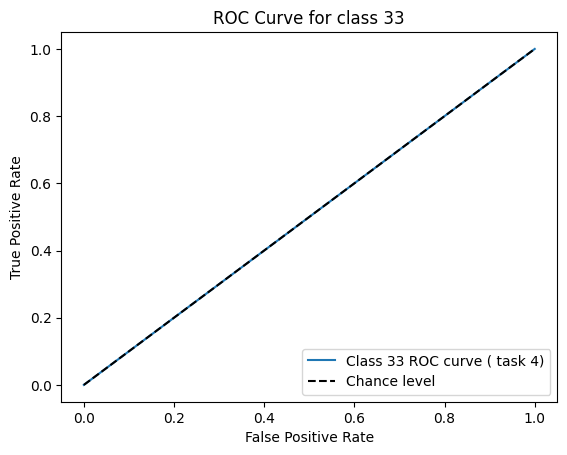

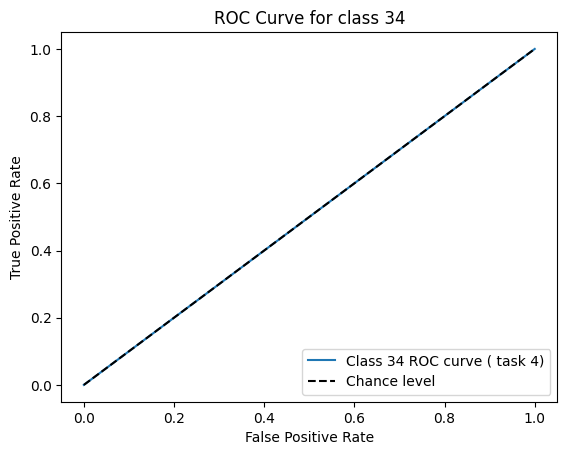

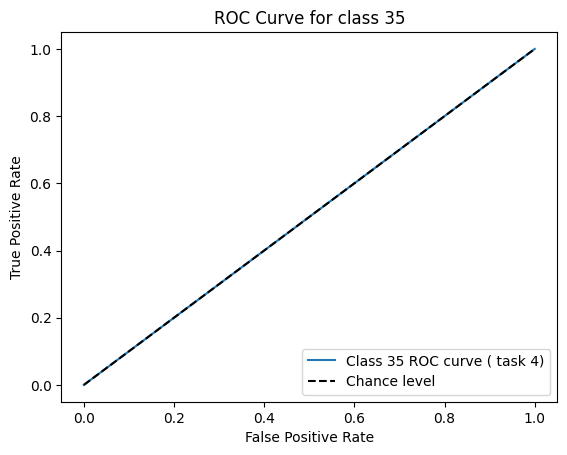

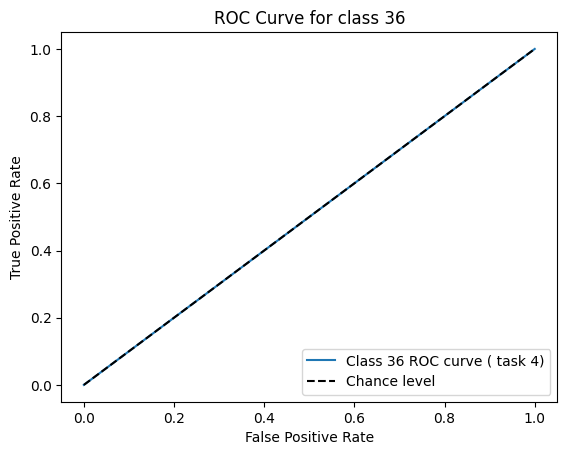

In [33]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_true_task4, y_pred_task4)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix for task4')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()



plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_task4, label='Training Accuracy')
plt.plot(val_accuracies_task4, label='Validation Accuracy')
plt.axhline(y=test_acc_task4, color='r', linestyle='-', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train, validation, test Accuracies for task4')
plt.legend()
plt.show()

y_pred_task4 = torch.tensor(y_pred_task4_2)
y_true_task4 = torch.tensor(y_true_task4, dtype=torch.int64)
metric = ROC(num_classes=36, task="multiclass")
metric.update(y_pred_task4, y_true_task4)
x_task4, y_task4, z_task4 = metric.compute()
for i, (class_fpr, class_tpr) in enumerate(zip(x_task4, y_task4)):
    plt.plot(class_fpr, class_tpr, label=f'Class {i+1} ROC curve ( task 4)')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance level')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for class {i+1}')
    plt.legend(loc="lower right")
    plt.show()

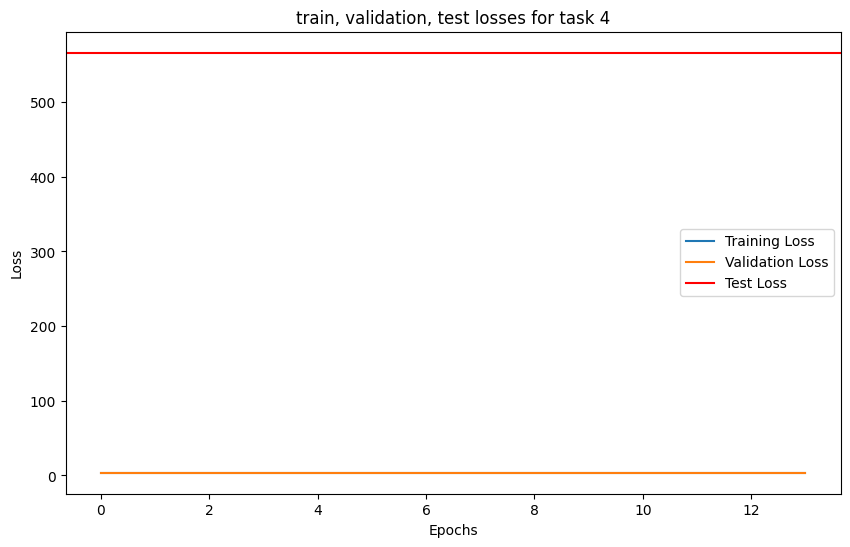

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses_task4, label='Training Loss')
plt.plot(validation_losses_task4, label='Validation Loss')
plt.axhline(y=test_loss_task4, color='r', linestyle='-', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train, validation, test losses for task 4')
plt.legend()
plt.show()

Comparision graphs for part 3 and part 4

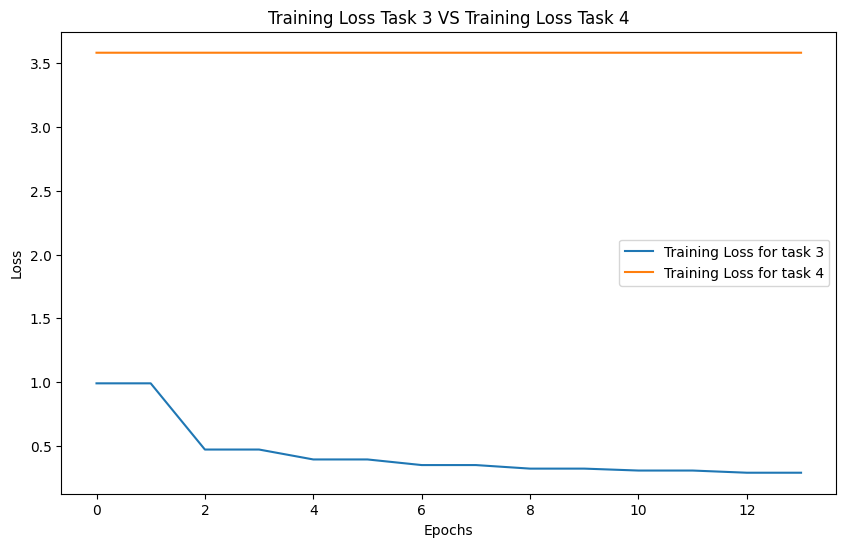

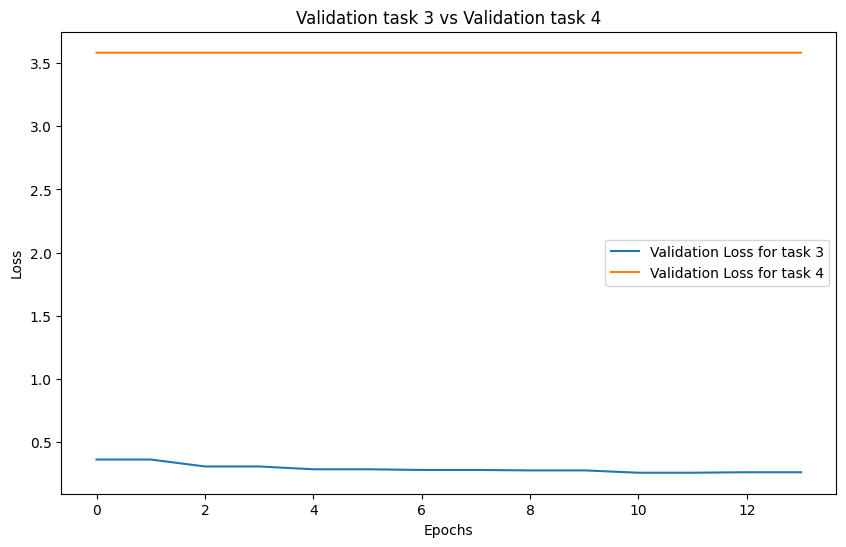

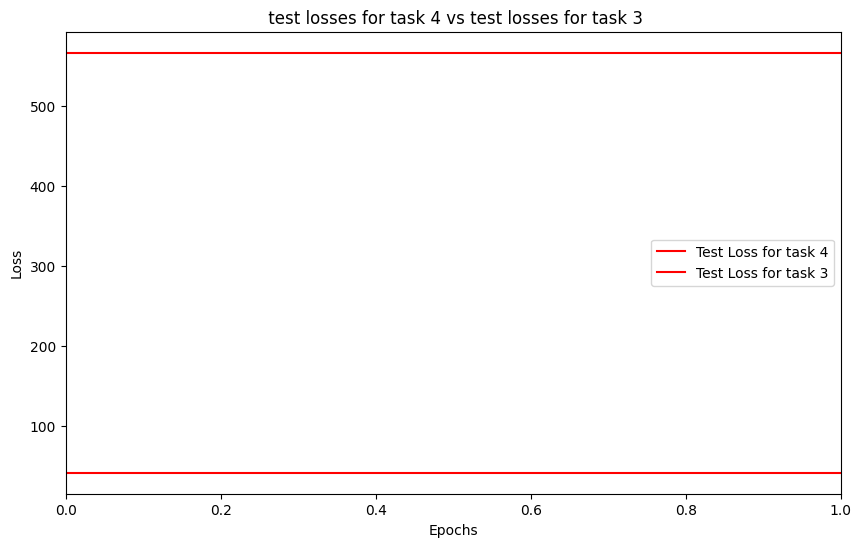

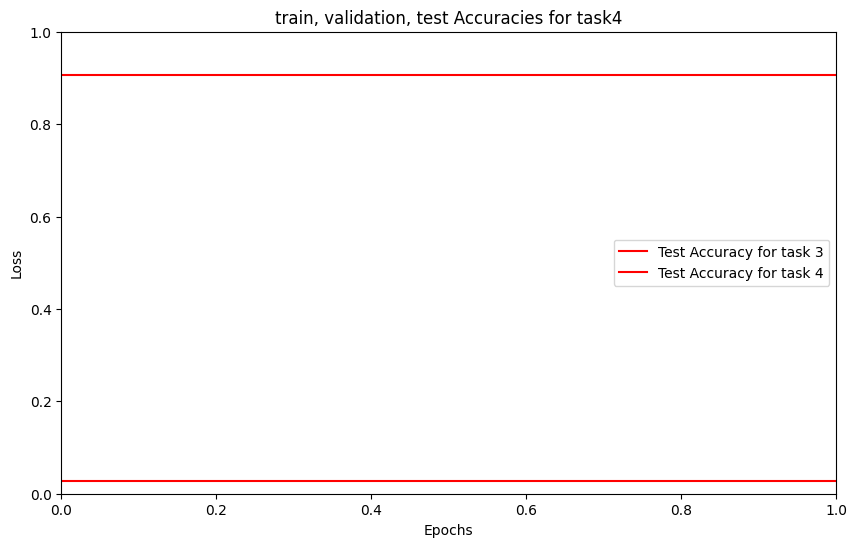

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss for task 3')
plt.plot(validation_losses_task4, label='Training Loss for task 4')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Task 3 VS Training Loss Task 4')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(validation_losses, label='Validation Loss for task 3')
plt.plot(validation_losses_task4, label='Validation Loss for task 4')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation task 3 vs Validation task 4')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

plt.axhline(y=test_loss_task4, color='r', linestyle='-', label='Test Loss for task 4')
plt.axhline(y=test_loss, color='r', linestyle='-', label='Test Loss for task 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(' test losses for task 4 vs test losses for task 3')
plt.legend()
plt.show()


##########  testing accuracies comparisions for task3 vs task 4 ############

plt.figure(figsize=(10, 6))

plt.axhline(y=test_acc, color='r', linestyle='-', label='Test Accuracy for task 3')
plt.axhline(y=test_acc_task4, color='r', linestyle='-', label='Test Accuracy for task 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('train, validation, test Accuracies for task4')
plt.legend()
plt.show()
